<a href="https://colab.research.google.com/github/nirmit27/ml-notebooks/blob/main/ML/PCA_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Digit Recognition**
Using **Principal Component Analysis** and **KNN Algorithm** to correctly identify digits from a dataset of tens of thousands of handwritten images.

### Importing the necessary modules

In [1]:
import time
from zipfile import ZipFile

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler as SS
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split as tts
from sklearn.neighbors import KNeighborsClassifier as KNC

from sklearn.metrics import accuracy_score as accuracy
from sklearn.metrics import confusion_matrix as c_matrix

### Importing the dataset from Kaggle
> [**MNIST dataset** for Digit Recognition](https://www.kaggle.com/competitions/digit-recognizer/data)

In [2]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

!kaggle competitions download -c digit-recognizer

 59% 9.00M/15.3M [00:00<00:00, 38.9MB/s]
100% 15.3M/15.3M [00:00<00:00, 60.7MB/s]


In [3]:
filepath = r"/content/digit-recognizer.zip"
with ZipFile(filepath, 'r') as zip:
  zip.extractall()

print("Dataset extracted from .zip file.")

Dataset extracted from .zip file.


In [4]:
train_path = r"/content/train.csv"
test_path = r"/content/test.csv"
df = pd.read_csv(train_path)

df.shape

(42000, 785)

In [ ]:
df.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
11910,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Visualizing the digital images

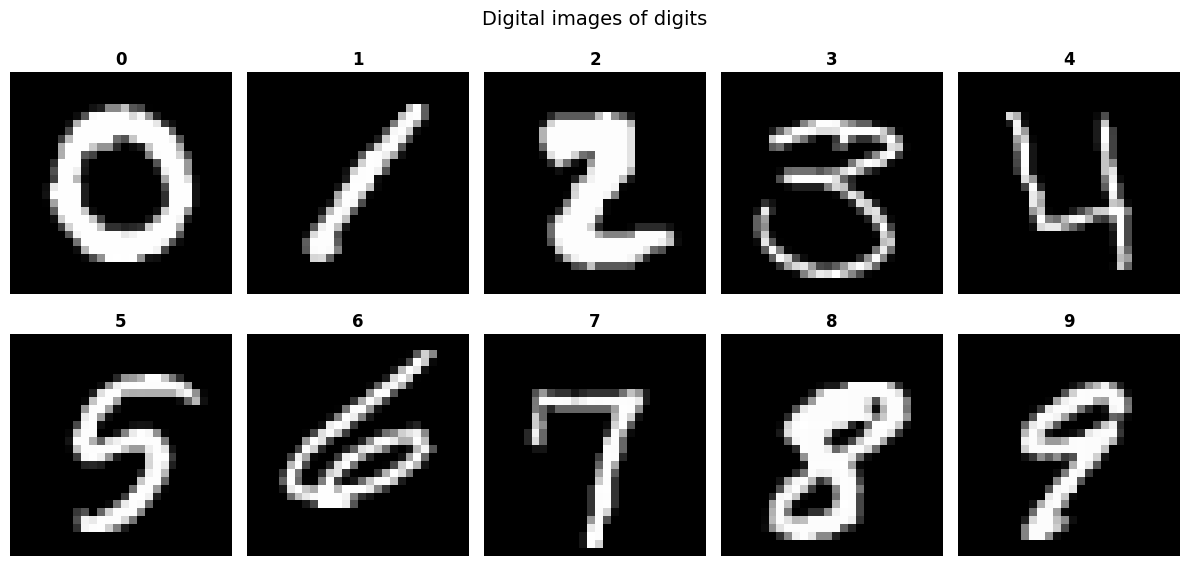

In [8]:
cols = df.label.unique().shape[0] // 2
rows = df.label.unique().shape[0] // 5

fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(12, 6))
fig.suptitle("Digital images of digits", fontsize=14)
axs = axs.flatten()

for i in range(rows * cols):
  axs[i].imshow(df[df.label == i].iloc[0, 1:].values.reshape((28, 28)), cmap=plt.get_cmap('gray'))
  axs[i].set_title(i, fontweight='bold')
  axs[i].axis('off')

plt.tight_layout()
plt.show()

### Splitting the dataset

In [9]:
X = df.iloc[:, 1:]
y = df.label

X.shape, y.shape

((42000, 784), (42000,))

In [12]:
X_train1, X_test1, y_train1, y_test1 = tts(X, y, test_size=0.2, random_state=55)
X_train2, X_test2, y_train2, y_test2 = tts(X, y, test_size=0.2, random_state=55)

X_train1.shape, X_test1.shape, X_train2.shape, X_test2.shape

((33600, 784), (8400, 784), (33600, 784), (8400, 784))

### Dimensionality reduction
> Using **PCA** to reduce the number of columns in the `X` split.

#### Standardization

In [15]:
scaler = SS()
X_train1 = scaler.fit_transform(X_train1)
X_test1 = scaler.transform(X_test1)

X_test1[:, 100]

array([-0.26296134, -0.26296134, -0.26296134, ...,  4.0283453 ,
        2.4515396 , -0.26296134])

#### PCA
> Reducing the number of columns from **784** to **200** using `PCA`.

In [16]:
pca = PCA(n_components=200)
X_train1 = pca.fit_transform(X_train1)
X_test1 = pca.transform(X_test1)

X_train1.shape[1], X_test1.shape[1]

(200, 200)

### Model training

| Status | Training time (seconds) |
| ------ | ------------- |
| With PCA | 5 - 7 |
| Without PCA | 20 - 23 |

In [17]:
neighbors = 5
weights = 'uniform'
metric = 'minkowski'

# With PCA
knn1 = KNC(n_neighbors=neighbors, weights=weights, metric=metric)
knn1.fit(X_train1, y_train1)

# Without PCA
knn2 = KNC(n_neighbors=neighbors, weights=weights, metric=metric)
knn2.fit(X_train2, y_train2)

KNeighborsClassifier()

#### **With** PCA

In [19]:
%%time
t1 = time.time()

y_pred1 = knn1.predict(X_test1)

t2 = time.time()
print(f"Training time : {(t2 - t1):.2f} seconds\n")

Training time : 4.99 seconds

CPU times: user 4.98 s, sys: 16.9 ms, total: 4.99 s
Wall time: 4.99 s


#### **Without** PCA

In [21]:
%%time
t1 = time.time()

y_pred2 = knn2.predict(X_test2)

t2 = time.time()
print(f"Training time : {(t2 - t1):.2f} seconds\n")

Training time : 22.53 seconds

CPU times: user 30.5 s, sys: 2.12 s, total: 32.6 s
Wall time: 22.5 s


### Model evaluation

| Status | Accuracy (%) |
| ------ | ------------- |
| With PCA | 94 - 95 |
| Without PCA | 96 - 97 |

In [22]:
print(f"Model accuracy (with PCA)\t: {(accuracy(y_test1, y_pred1) * 100):.2f}%")
print(f"Model accuracy (without PCA)\t: {(accuracy(y_test2, y_pred2) * 100):.2f}%")

Model accuracy (with PCA)	: 94.52%
Model accuracy (without PCA)	: 96.61%


In [45]:
def plot_confusion(y_test, y_pred, status, ax):
  cm = c_matrix(y_test, y_pred)
  sns.heatmap(cm, annot=True, fmt="d", cmap=sns.cubehelix_palette(as_cmap=True), ax=ax)

  ax.set_title(f"Confusion Matrix {status}", fontsize=16, pad=12)
  ax.set_xlabel("Predicted labels", fontweight='bold', labelpad=12)
  ax.set_ylabel("Ground truth", fontweight='bold', labelpad=12)

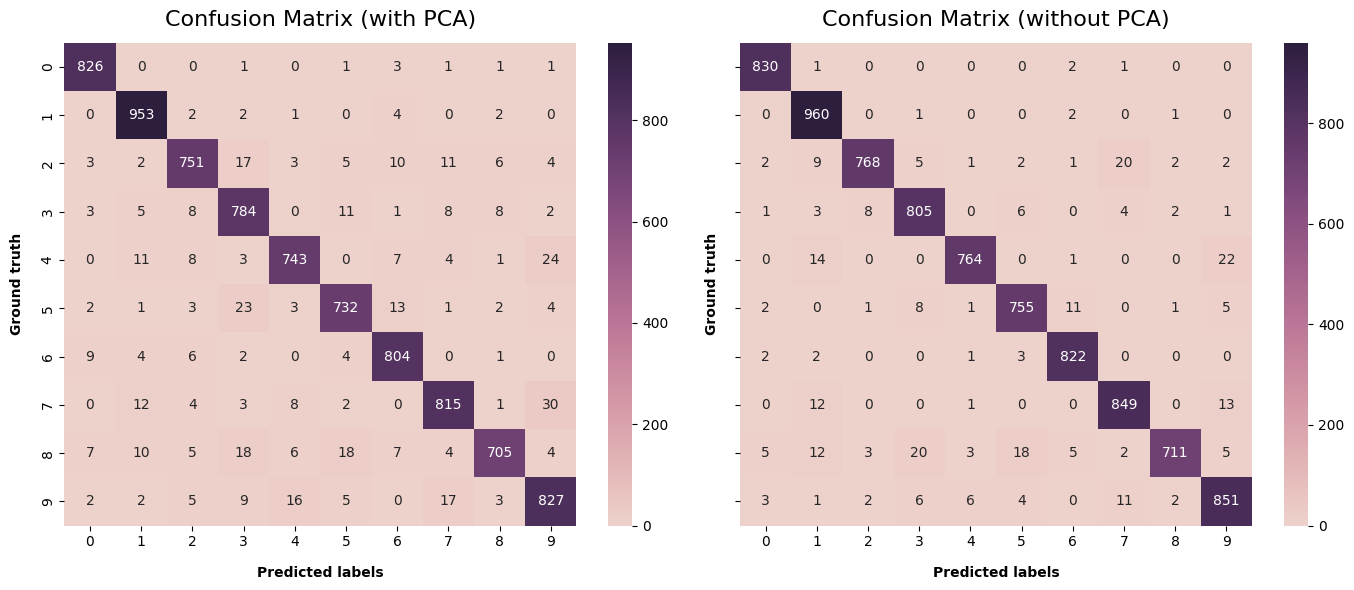

In [49]:
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(14, 6))

plot_confusion(y_test1, y_pred1, "(with PCA)", axs[0])
plot_confusion(y_test2, y_pred2, "(without PCA)", axs[1])

plt.tight_layout()
plt.show()